In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [161]:
#import our CSV file
yearly_stats_all_pos_df = pd.read_csv('yearly data/all_players_yearly_stats_2002-2020.csv')
yearly_stats_all_pos_df.head()

,Season,Rk,Player,Team,Pos,Age,Games Played,Games Started,Pass Comp,Pass Att,...,Total TD,2pt Convs Made,2pt Conv Passes,FPts,PPR,DK Fpts,FD Fpts,VBD,Pos Rank,Overall Rank
0,2019,34,A.J. Brown,TEN,WR,22,16,11,0,0,...,9,0,0,165,217.1,220.1,191.1,36,9,34
1,2020,28,A.J. Brown,TEN,WR,23,14,12,0,0,...,12,0,0,178,247.5,251.5,212.5,52,9,28
2,2016,348,A.J. Derby,2TM,TE,25,10,3,0,0,...,0,0,0,14,30.0,34.0,22.0,0,65,0
3,2017,270,A.J. Derby,2TM,TE,26,11,1,0,0,...,2,0,0,34,55.4,59.4,44.9,0,41,0
4,2018,381,A.J. Derby,MIA,TE,27,4,0,0,0,...,1,0,0,11,13.8,13.8,12.3,0,75,0


In [162]:
yearly_stats_all_pos_df.drop(['Rk', '2pt Convs Made', '2pt Conv Passes', 'FPts', 'PPR',
       'DK Fpts', 'FD Fpts', 'VBD', 'Pos Rank', 'Overall Rank', 'Fumbles', 'Games Started'], axis=1, inplace=True)

In [163]:
yearly_stats_all_pos_df.columns

Index(['Season', 'Player', 'Team', 'Pos', 'Age', 'Games Played', 'Pass Comp',
       'Pass Att', 'Pass Yds', 'Pass TD', 'Pass Int', 'Rush Att', 'Rush Yds',
       'Rush Y/A', 'Rush TD', 'Rec Tgt', 'Receptions', 'Rec Yds', 'Rec Y/R',
       'Rec TD', 'Fumbles Lost', 'Total TD'],
      dtype='object')

In [164]:
yearly_stats_all_pos_df['FantasyPoints'] = yearly_stats_all_pos_df['Rush Yds']*0.1 + yearly_stats_all_pos_df['Rush TD']*6 + yearly_stats_all_pos_df['Receptions'] + yearly_stats_all_pos_df['Rec Yds']*0.1 + yearly_stats_all_pos_df['Rec TD']*6 - yearly_stats_all_pos_df['Fumbles Lost']*2 + yearly_stats_all_pos_df['Pass Yds']*0.04 + yearly_stats_all_pos_df['Pass TD']*4

In [165]:
#Create new column for Fantasy points per game.
yearly_stats_all_pos_df['FantasyPoints/Game'] = yearly_stats_all_pos_df['FantasyPoints']/yearly_stats_all_pos_df['Games Played']
yearly_stats_all_pos_df['FantasyPoints/Game'] = yearly_stats_all_pos_df['FantasyPoints/Game'].apply(lambda x: round(x, 2))

In [166]:
yearly_stats_all_pos_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Season'] == 2020]

In [167]:
#separate dataframes based off position
rb_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Pos'] == 'RB']
qb_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Pos'] == 'QB']
wr_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Pos'] == 'WR']
te_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Pos'] == 'TE']

# RB: Compare usage vs efficiency 

In [168]:
#Create new column for usage per game. Usage is defined as # of targets + carries
rb_df['Usage/Game'] = (rb_df['Rush Att'] + rb_df['Rec Tgt'])/rb_df['Games Played']

#round each row value to two decimal places
rb_df['Usage/Game'] = rb_df['Usage/Game'].apply(lambda x: round(x, 2))

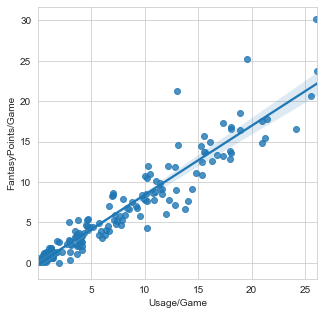

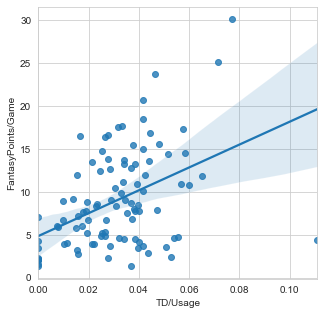

In [169]:
#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=rb_df['Usage/Game'],
y=rb_df['FantasyPoints/Game'],
scatter=True,)


#How does efficiency correlate to fantasy football performance?
rb_df['TD/Usage'] = (rb_df['Rush TD']+ rb_df['Rec TD'])/(rb_df['Rush Att'] + rb_df['Rec Tgt'])
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#Make sure there is an adequete sample size
rb_df = rb_df[rb_df['Rush Att'] > 20]
plot = sns.regplot(
x=rb_df['TD/Usage'],
y=rb_df['FantasyPoints/Game'],
scatter=True)

# WR: Compare usage vs efficiency

In [170]:
#Create new column for usage per game. Usage is defined as # of targets + carries
wr_df['Usage/Game'] = (wr_df['Rush Att'] + wr_df['Rec Tgt'])/wr_df['Games Played']

#round each row value to two decimal places
wr_df['Usage/Game'] = wr_df['Usage/Game'].apply(lambda x: round(x, 2))

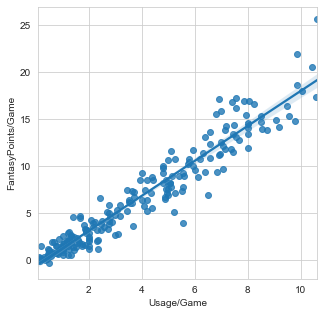

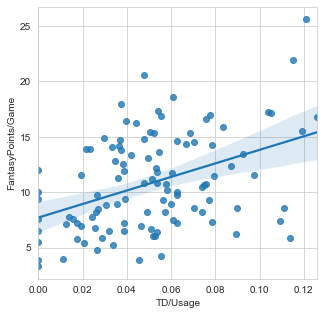

In [172]:
#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=wr_df['Usage/Game'],
y=wr_df['FantasyPoints/Game'],
scatter=True,)



#How does efficiency correlate to fantasy football performance?
wr_df['TD/Usage'] = (wr_df['Rush TD']+ wr_df['Rec TD'])/(wr_df['Rush Att'] + wr_df['Rec Tgt'])
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#Make sure there is an adequete sample size
wr_df = wr_df[wr_df['Receptions'] > 20]
plot = sns.regplot(
x=wr_df['TD/Usage'],
y=wr_df['FantasyPoints/Game'],
scatter=True)

# TE: Compare usage vs efficiency


In [175]:
#Create new column for usage per game. Usage is defined as # of targets + carries
te_df['Usage/Game'] = (te_df['Rush Att'] + te_df['Rec Tgt'])/te_df['Games Played']

#round each row value to two decimal places
te_df['Usage/Game'] = te_df['Usage/Game'].apply(lambda x: round(x, 2))

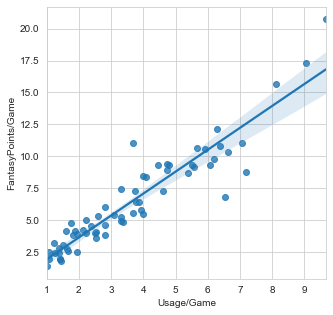

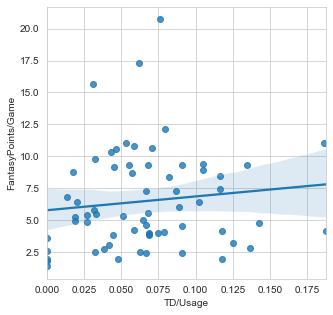

In [176]:
#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=te_df['Usage/Game'],
y=te_df['FantasyPoints/Game'],
scatter=True,)



#How does efficiency correlate to fantasy football performance?
te_df['TD/Usage'] = (te_df['Rush TD']+ te_df['Rec TD'])/(te_df['Rush Att'] + te_df['Rec Tgt'])
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#Make sure there is an adequete sample size
te_df = te_df[te_df['Receptions'] > 10]
plot = sns.regplot(
x=te_df['TD/Usage'],
y=te_df['FantasyPoints/Game'],
scatter=True)

# QB: Compare usage vs efficiency


In [177]:
yearly_stats_all_pos_df.columns

Index(['Season', 'Player', 'Team', 'Pos', 'Age', 'Games Played', 'Pass Comp',
       'Pass Att', 'Pass Yds', 'Pass TD', 'Pass Int', 'Rush Att', 'Rush Yds',
       'Rush Y/A', 'Rush TD', 'Rec Tgt', 'Receptions', 'Rec Yds', 'Rec Y/R',
       'Rec TD', 'Fumbles Lost', 'Total TD', 'FantasyPoints',
       'FantasyPoints/Game'],
      dtype='object')

In [178]:
#Create new column for usage per game. Usage is defined as # of targets + carries
qb_df['Usage/Game'] = (qb_df['Pass Att'] + qb_df['Rush Att'])/qb_df['Games Played']

#round each row value to two decimal places
qb_df['Usage/Game'] = qb_df['Usage/Game'].apply(lambda x: round(x, 2))

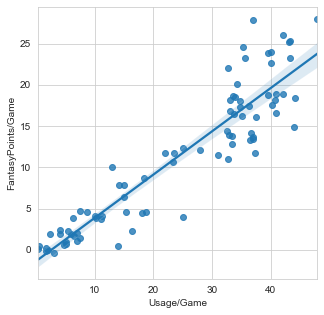

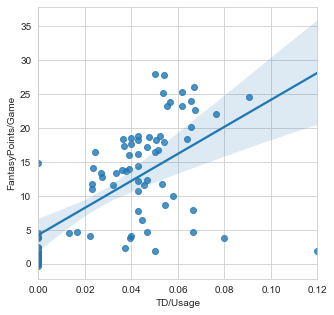

In [180]:
#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=qb_df['Usage/Game'],
y=qb_df['FantasyPoints/Game'],
scatter=True,)



#How does efficiency correlate to fantasy football performance?
qb_df['TD/Usage'] = (qb_df['Pass TD']+ qb_df['Rush TD'])/(qb_df['Pass Att'] + qb_df['Rush Att'])
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

#Make sure there is an adequete sample size
#qb_df = qb_df[qb_df['Receptions'] > 10]
plot = sns.regplot(
x=qb_df['TD/Usage'],
y=qb_df['FantasyPoints/Game'],
scatter=True)